<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-2-Regression-1/blob/master/module4-understanding-ols/_OLS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [2]:
from google.colab import files
files.upload()

Saving Weirddata - Sheet1.csv to Weirddata - Sheet1 (4).csv


{'Weirddata - Sheet1.csv': b'End of Fiscal Year,Debt/ GDP Ratio,Presidential Approval Ratings AvG,Voting Elegible Population Turnout Rate,BirthRate US ,Births,Food Inflation Rate\r\n1952,0.72,45.4,62.3,25.1,"3,913,000.00",0.02\r\n1956,0.61,65,60.2,25.2,"4,218,000.00",0.01\r\n1960,0.53,70.1,63.8,23.7,"4,257,850.00",0.01\r\n1964,0.46,55.1,62.8,21,"4,027,490.00",0.01\r\n1968,0.37,55.1,62.5,17.5,"3,501,564.00",0.04\r\n1972,0.34,49,56.2,15.6,"3,258,411.00",0.04\r\n1976,0.33,47.2,54.8,14.8,"3,167,788.00",0.03\r\n1980,0.32,45.5,54.2,15.9,"3,612,258.00",0.09\r\n1984,0.38,52.8,55.2,15.5,"3,669,141.00",0.04\r\n1988,0.49,52.8,52.8,15.9,"3,913,000.00",0.04\r\n1992,0.62,60.9,58.1,16.2,"4,084,000.00",0.01\r\n1996,0.64,55.1,51.7,14.8,"3,899,000.00",0.03\r\n2000,0.55,55.1,54.2,14.7,"4,058,814.00",0.02\r\n2004,0.60,49.4,60.1,14,"4,112,052.00",0.03\r\n2008,0.68,49.4,61.6,14,"4,250,000.00",0.06\r\n2012,0.99,47.9,58.6,12.6,"3,950,000.00",0.03\r\n2016,1.04,47.9,60.1,12.2,"3,950,000.00",0.00'}

In [0]:
weird = pd.read_csv('Weirddata - Sheet1.csv')

In [4]:
weird.head()

,End of Fiscal Year,Debt/ GDP Ratio,Presidential Approval Ratings AvG,Voting Elegible Population Turnout Rate,BirthRate US,Births,Food Inflation Rate
0,1952,0.72,45.4,62.3,25.1,"3,913,000.00",0.02
1,1956,0.61,65.0,60.2,25.2,"4,218,000.00",0.01
2,1960,0.53,70.1,63.8,23.7,"4,257,850.00",0.01
3,1964,0.46,55.1,62.8,21.0,"4,027,490.00",0.01
4,1968,0.37,55.1,62.5,17.5,"3,501,564.00",0.04


In [0]:
weird.dtypes
weird['Births'] = weird['Births'].str.replace(",","").astype('float')

In [0]:
weird.rename(columns={'End of Fiscal Year':'Year'}, inplace=True)


In [0]:
df = votes.merge(weird)

In [8]:
df.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Debt/ GDP Ratio,Presidential Approval Ratings AvG,Voting Elegible Population Turnout Rate,BirthRate US,Births,Food Inflation Rate
0,1952,Stevenson,Eisenhower,44.60,0.72,45.4,62.3,25.1,3913000.0,0.02
1,1956,Eisenhower,Stevenson,57.76,0.61,65.0,60.2,25.2,4218000.0,0.01
2,1960,Nixon,Kennedy,49.91,0.53,70.1,63.8,23.7,4257850.0,0.01
3,1964,Johnson,Goldwater,61.34,0.46,55.1,62.8,21.0,4027490.0,0.01
4,1968,Humphrey,Nixon,49.60,0.37,55.1,62.5,17.5,3501564.0,0.04


In [9]:
df.dtypes

Year                                         int64
Incumbent Party Candidate                   object
Other Candidate                             object
Incumbent Party Vote Share                 float64
Debt/ GDP Ratio                            float64
Presidential Approval Ratings AvG          float64
Voting Elegible Population Turnout Rate    float64
BirthRate US                               float64
Births                                     float64
Food Inflation Rate                        float64
dtype: object

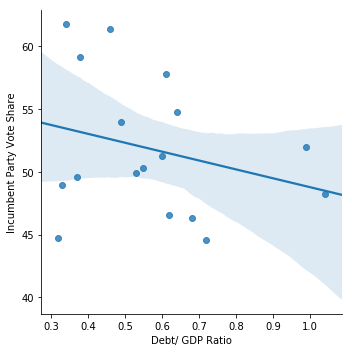

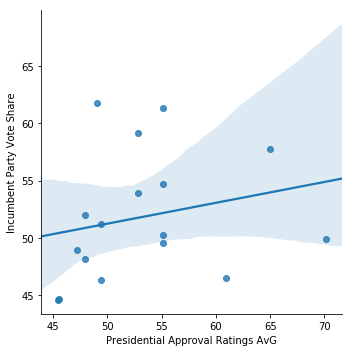

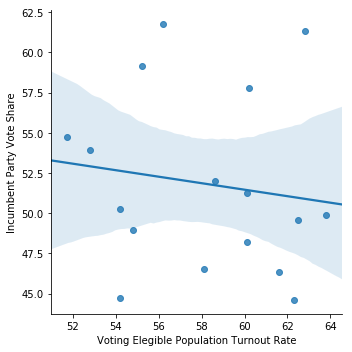

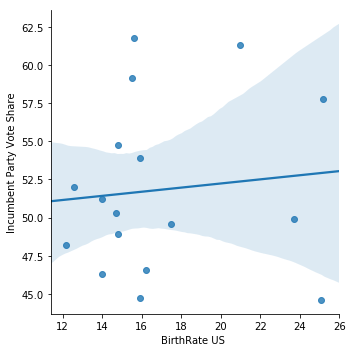

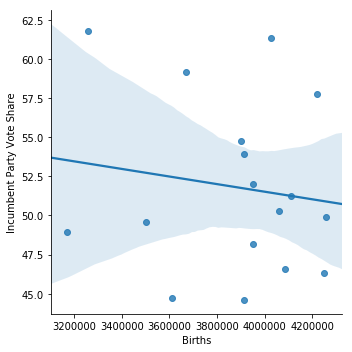

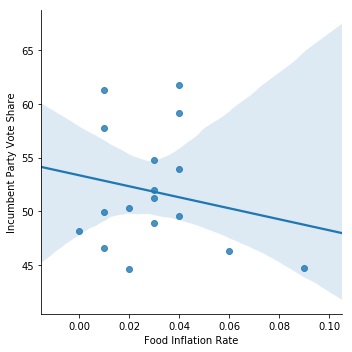

In [10]:
%matplotlib inline
import seaborn as sns

target = 'Incumbent Party Vote Share'
features = [
             'Debt/ GDP Ratio',
             'Presidential Approval Ratings AvG',
             'Voting Elegible Population Turnout Rate',
             'BirthRate US ',
             'Births',
             'Food Inflation Rate']

for feature in features:
    sns.lmplot(x=feature, y=target, data=df)

In [0]:
x = df['Presidential Approval Ratings AvG']
y = df['Incumbent Party Vote Share']

m = 0
b = y.mean()
y_pred = m*x + b

Mean Absolute Error: 4.463806228373702
R^2: 0.0


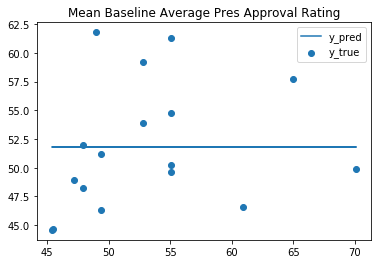

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def plot_preds(x, y, y_pred):
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_pred')
    plt.legend()
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
    
plot_preds(x, y, y_pred)
plt.title('Mean Baseline Average Pres Approval Rating');

Mean Absolute Error: 41.82823529411765
R^2: -61.213666648208594


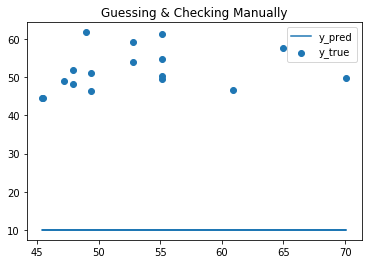

In [13]:
m = 0
b = 10
y_pred = m*x + b
plot_preds(x, y, y_pred)
plt.title('Guessing & Checking Manually');

Mean Absolute Error: 153.64823529411763
R^2: -838.3040300398974


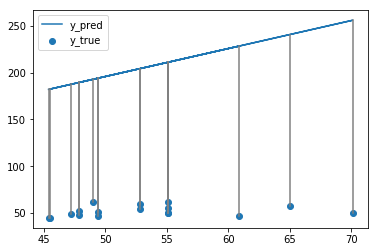

In [14]:
def regression_residuals(df, feature, target, m, b):
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_pred')
    plt.legend()
    
    # Plot residual errors
    for x, y1, y2 in zip(x, y, y_pred):
        plt.plot((x, x), (y1, y2), color='grey')
        
    mae = mean_absolute_error(y, y_pred) 
    r2 = r2_score(y, y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
        
regression_residuals(df, feature='Presidential Approval Ratings AvG', 
                     target='Incumbent Party Vote Share', m=3, b=46)

In [15]:
from ipywidgets import interact, fixed

interact(regression_residuals, 
         df=fixed(df), 
         feature=fixed('Presidential Approval Ratings AvG'), 
         target=fixed('Incumbent Party Vote Share'), 
         m=(-10,10,0.5), 
         b=(40,60,0.5));

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

Mean Squared Error: 23988.881494117646
Root Mean Squared Error: 154.8834448678026
Mean Absolute Error: 153.64823529411763
R^2: -838.3040300398974


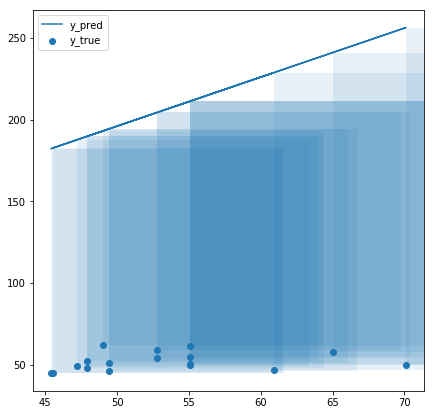

In [16]:
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.metrics import mean_squared_error

def regression_squared_errors(df, feature, target, m, b):
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    ax.scatter(x, y, label='y_true')
    ax.plot(x, y_pred, label='y_pred')
    ax.legend()
    
    # Plot square errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
        
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
    
regression_squared_errors(df, feature='Presidential Approval Ratings AvG', 
           target='Incumbent Party Vote Share', m=3, b=46)

In [17]:
interact(regression_squared_errors, 
         df=fixed(df), 
         feature=fixed('Presidential Approval Ratings AvG'), 
         target=fixed('Incumbent Party Vote Share'), 
         m=(-10,10,0.5), 
         b=(40,60,0.5));

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

In [18]:
b = 46
ms = np.arange(-10,10,0.5)
sses = []

for m in ms:
    predictions = m * df[feature] + b
    errors = predictions - df[target]
    square_errors = errors ** 2
    sse = square_errors.sum()
    sses.append(sse)
    
hypotheses = pd.DataFrame({'Slope': ms})
hypotheses['Intercept'] = b
hypotheses['Sum of Square Errors'] = sses

hypotheses

,Slope,Intercept,Sum of Square Errors
0,-10.0,46,1117.305400
1,-9.5,46,1114.499025
2,-9.0,46,1111.704100
3,-8.5,46,1108.920625
4,-8.0,46,1106.148600
5,-7.5,46,1103.388025
6,-7.0,46,1100.638900
7,-6.5,46,1097.901225
8,-6.0,46,1095.175000
9,-5.5,46,1092.460225


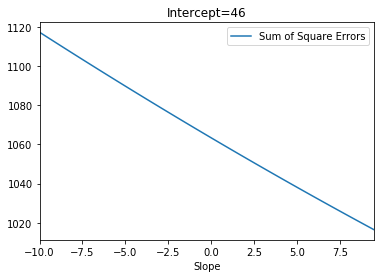

In [19]:
hypotheses.plot(x='Slope', y='Sum of Square Errors', 
                title=f'Intercept={b}');

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

features = ['Presidential Approval Ratings AvG']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.intercept_, model.coef_, 

(42.16419334177994, array([0.18179563]))

In [22]:
model.predict([[0]])

array([42.16419334])

In [23]:
model.predict([[1]])

array([42.34598897])

In [24]:
model.predict([[1]]) - model.predict([[0]])

array([0.18179563])

In [25]:
model.predict([[2]])

array([42.52778461])

In [26]:
model.predict([[2]]) - model.predict([[1]])

array([0.18179563])

Mean Absolute Error: 4.355475126822324
R^2: 0.051537724662969686


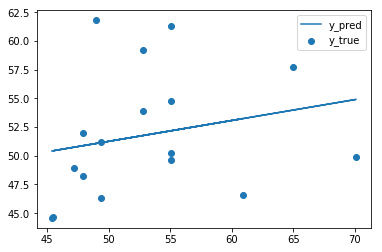

In [27]:
m = model.coef_[0]
b = model.intercept_

y_pred = m*x + b
plot_preds(x, y, y_pred)

Mean Absolute Error: 4.355475126822324
R^2: 0.051537724662969686


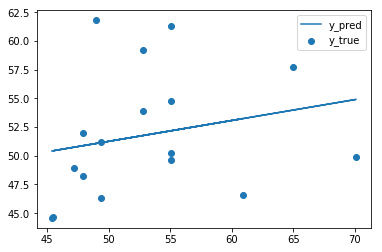

In [28]:
y_pred = model.predict(X)
plot_preds(x, y, y_pred)

In [0]:
from mpl_toolkits import mplot3d

def viz3D(fitted_model, df, features, target='', num=100):

    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    plt.show()

In [30]:
model = LinearRegression()

features = ['Presidential Approval Ratings AvG', 
            'BirthRate US ']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
pd.Series(model.coef_, features)

Presidential Approval Ratings AvG    0.191897
BirthRate US                        -0.031787
dtype: float64

In [32]:
df[features].describe()

,Presidential Approval Ratings AvG,BirthRate US
count,17.000000,17.000000
mean,53.158824,16.982353
std,6.881593,4.158010
min,45.400000,12.200000
25%,47.900000,14.700000
50%,52.800000,15.600000
75%,55.100000,17.500000
max,70.100000,25.200000


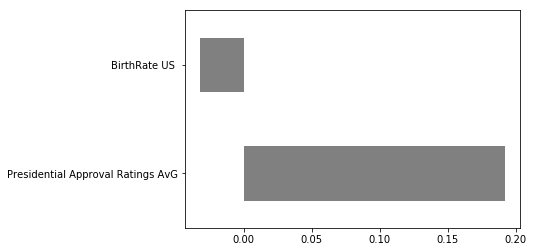

In [33]:
pd.Series(model.coef_, features).plot.barh(color='grey');

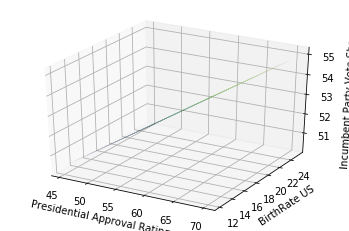

In [34]:

viz3D(model, df, features, target)

In [0]:
#interpret coefficient of a linear model
  
#https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/